# Esplorazione Dataset

Questo notebook carica il dataset Tensorflow "deep-weeds", esplora la struttura dati, ne visualizza degli esempi, e analizza dimensioni e caratteristiche


# 1. Caricamento del Dataset
Per prima cosa, carichiamo il Dataset "deep-weeds" dai Dataset di TensorFlow

In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds

# Caricamento Dataset TensorFlow 
dataset, info = tfds.load(
    "DeepWeeds", 
    shuffle_files= True,
    as_supervised= True,
    with_info= True,
    download= True,
    data_dir="../data/raw/tensorflow_datasets")


# 2. Visualizzazione Dataset

Carichiamo delle immagini prova per verificare il Dataset

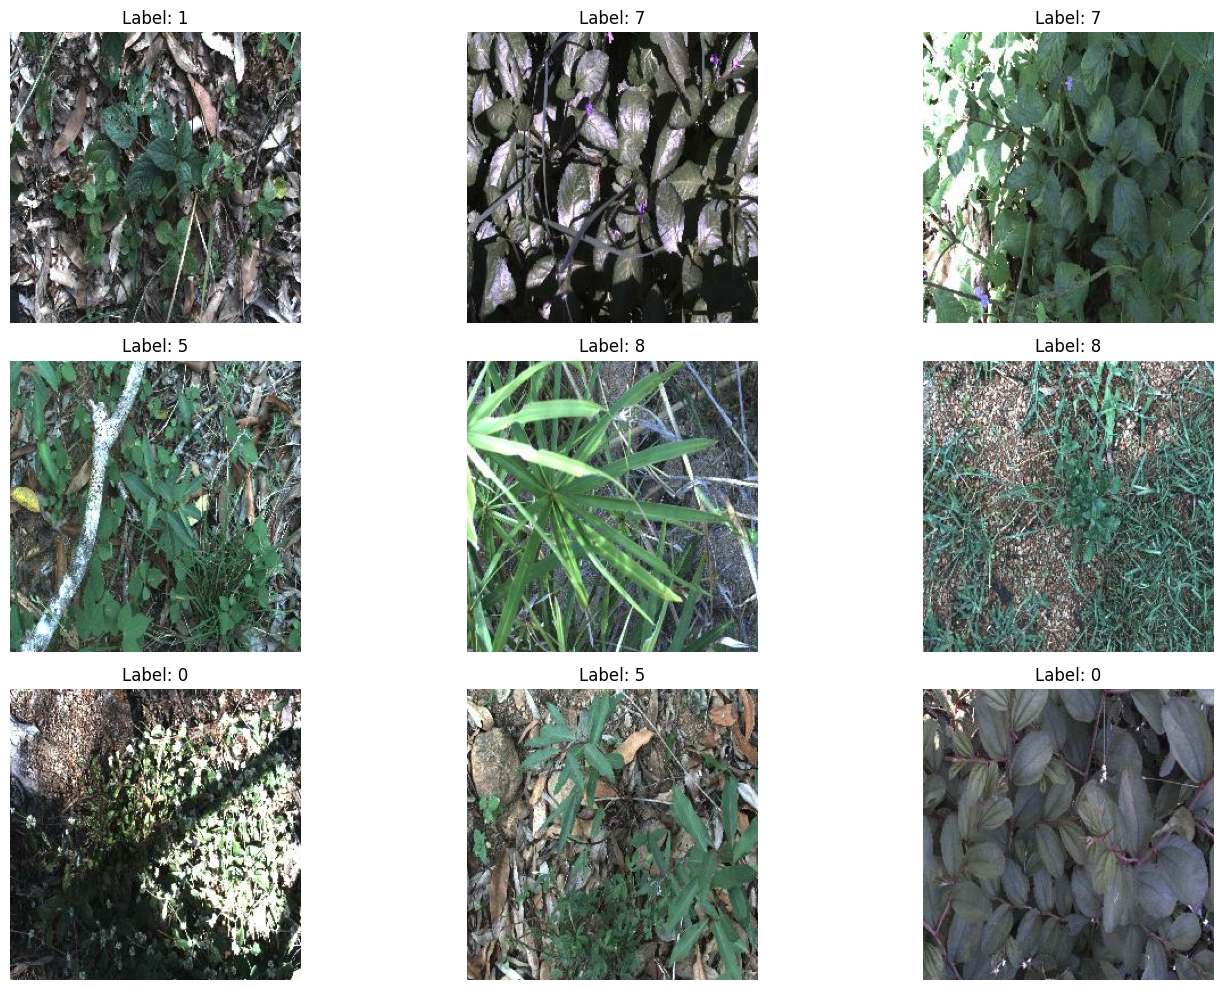

In [2]:
import matplotlib.pyplot as plt

training_set = dataset['train']

# Visualizza una griglia di immagini
plt.figure(figsize=(15, 10))
for i, (image, label) in enumerate(training_set.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Analisi statistica del Dataset

Contiamo il numero delle immagini e delle classi nel Dataset

In [3]:
# Informazioni generali sul dataset
print("=== INFORMAZIONI DATASET ===")
print(f"Numero totale di immagini nel training set: {info.splits['train'].num_examples}")
print(f"Numero totale di classi: {info.features['label'].num_classes}")

# Nomi delle classi
class_names = info.features['label'].names
print(f"Classi disponibili: {class_names}")

=== INFORMAZIONI DATASET ===
Numero totale di immagini nel training set: 17509
Numero totale di classi: 9
Classi disponibili: ['Chinee apple', 'Lantana', 'Parkinsonia', 'Parthenium', 'Prickly acacia', 'Rubber vine', 'Siam weed', 'Snake weed', 'Negative']


Analisi dei campioni rispetto alle classi


=== DISTRIBUZIONE CLASSI NEL TRAINING SET ===
Classe 0 (Chinee apple): 1125 immagini
Classe 1 (Lantana): 1064 immagini
Classe 2 (Parkinsonia): 1031 immagini
Classe 3 (Parthenium): 1022 immagini
Classe 4 (Prickly acacia): 1062 immagini
Classe 5 (Rubber vine): 1009 immagini
Classe 6 (Siam weed): 1074 immagini
Classe 7 (Snake weed): 1016 immagini
Classe 8 (Negative): 9106 immagini

Media immagini per classe: 1945.4
Deviazione standard: 2531.9
Min immagini per classe: 1009
Max immagini per classe: 9106


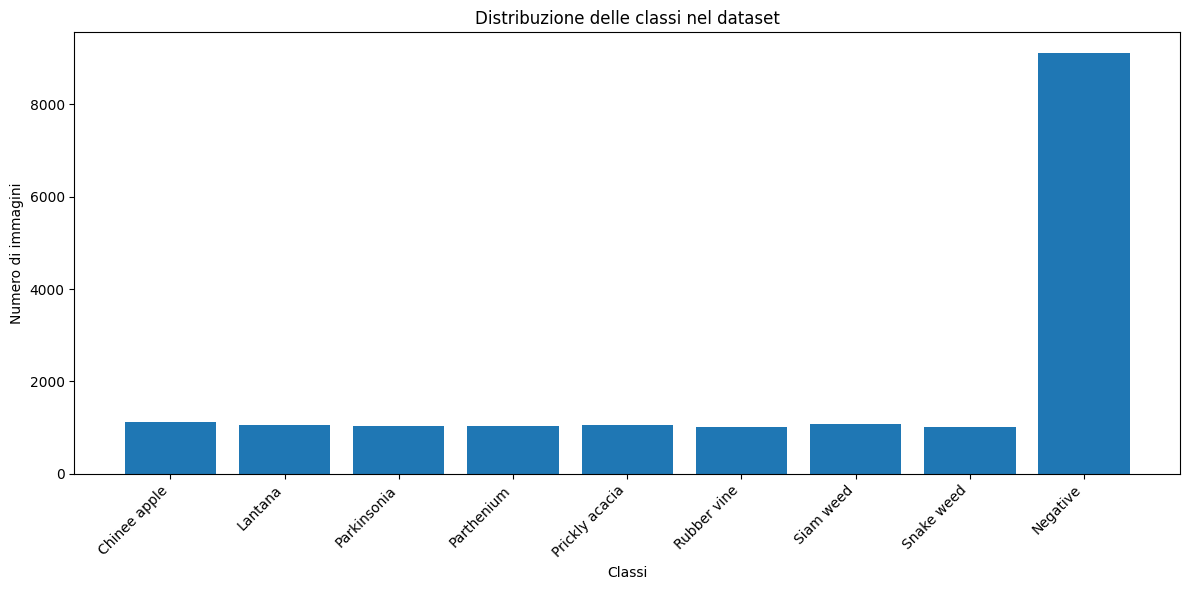

In [4]:
import numpy as np
from collections import Counter

# Conta le etichette nel training set
labels_list = []
for _, label in training_set:
    labels_list.append(label.numpy())

# Conta le occorrenze di ogni classe
label_counts = Counter(labels_list)

print("\n=== DISTRIBUZIONE CLASSI NEL TRAINING SET ===")
for class_idx, count in sorted(label_counts.items()):
    class_name = class_names[class_idx]
    print(f"Classe {class_idx} ({class_name}): {count} immagini")

# Statistiche sulla distribuzione
counts_array = np.array(list(label_counts.values()))
print(f"\nMedia immagini per classe: {counts_array.mean():.1f}")
print(f"Deviazione standard: {counts_array.std():.1f}")
print(f"Min immagini per classe: {counts_array.min()}")
print(f"Max immagini per classe: {counts_array.max()}")

# Grafico a barre per la distribuzione delle classi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
classes = [class_names[i] for i in sorted(label_counts.keys())]
counts = [label_counts[i] for i in sorted(label_counts.keys())]

plt.bar(range(len(classes)), counts)
plt.xlabel('Classi')
plt.ylabel('Numero di immagini')
plt.title('Distribuzione delle classi nel dataset')
plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Analisi bilanciamento Dataset

Calcoliamo il grado di bilanciamento del Dataset

In [5]:
# Analisi più dettagliata dello sbilanciamento
print("=== ANALISI BILANCIAMENTO ===")
total_images = sum(label_counts.values())
for class_idx, count in sorted(label_counts.items()):
    percentage = (count / total_images) * 100
    class_name = class_names[class_idx]
    print(f"{class_name}: {count} immagini ({percentage:.1f}%)")

# Calcola quanto è sbilanciato
max_count = max(label_counts.values())
min_count = min(label_counts.values())
imbalance_ratio = max_count / min_count
print(f"\nRapporto di sbilanciamento: {imbalance_ratio:.1f}:1")
if imbalance_ratio > 2:
    print("⚠️ Dataset significativamente sbilanciato - considera tecniche di bilanciamento")

=== ANALISI BILANCIAMENTO ===
Chinee apple: 1125 immagini (6.4%)
Lantana: 1064 immagini (6.1%)
Parkinsonia: 1031 immagini (5.9%)
Parthenium: 1022 immagini (5.8%)
Prickly acacia: 1062 immagini (6.1%)
Rubber vine: 1009 immagini (5.8%)
Siam weed: 1074 immagini (6.1%)
Snake weed: 1016 immagini (5.8%)
Negative: 9106 immagini (52.0%)

Rapporto di sbilanciamento: 9.0:1
⚠️ Dataset significativamente sbilanciato - considera tecniche di bilanciamento


# 5. Analisi statistica delle immagini

Analizziamo colori, intensità, luminosità e contrasto delle immagini

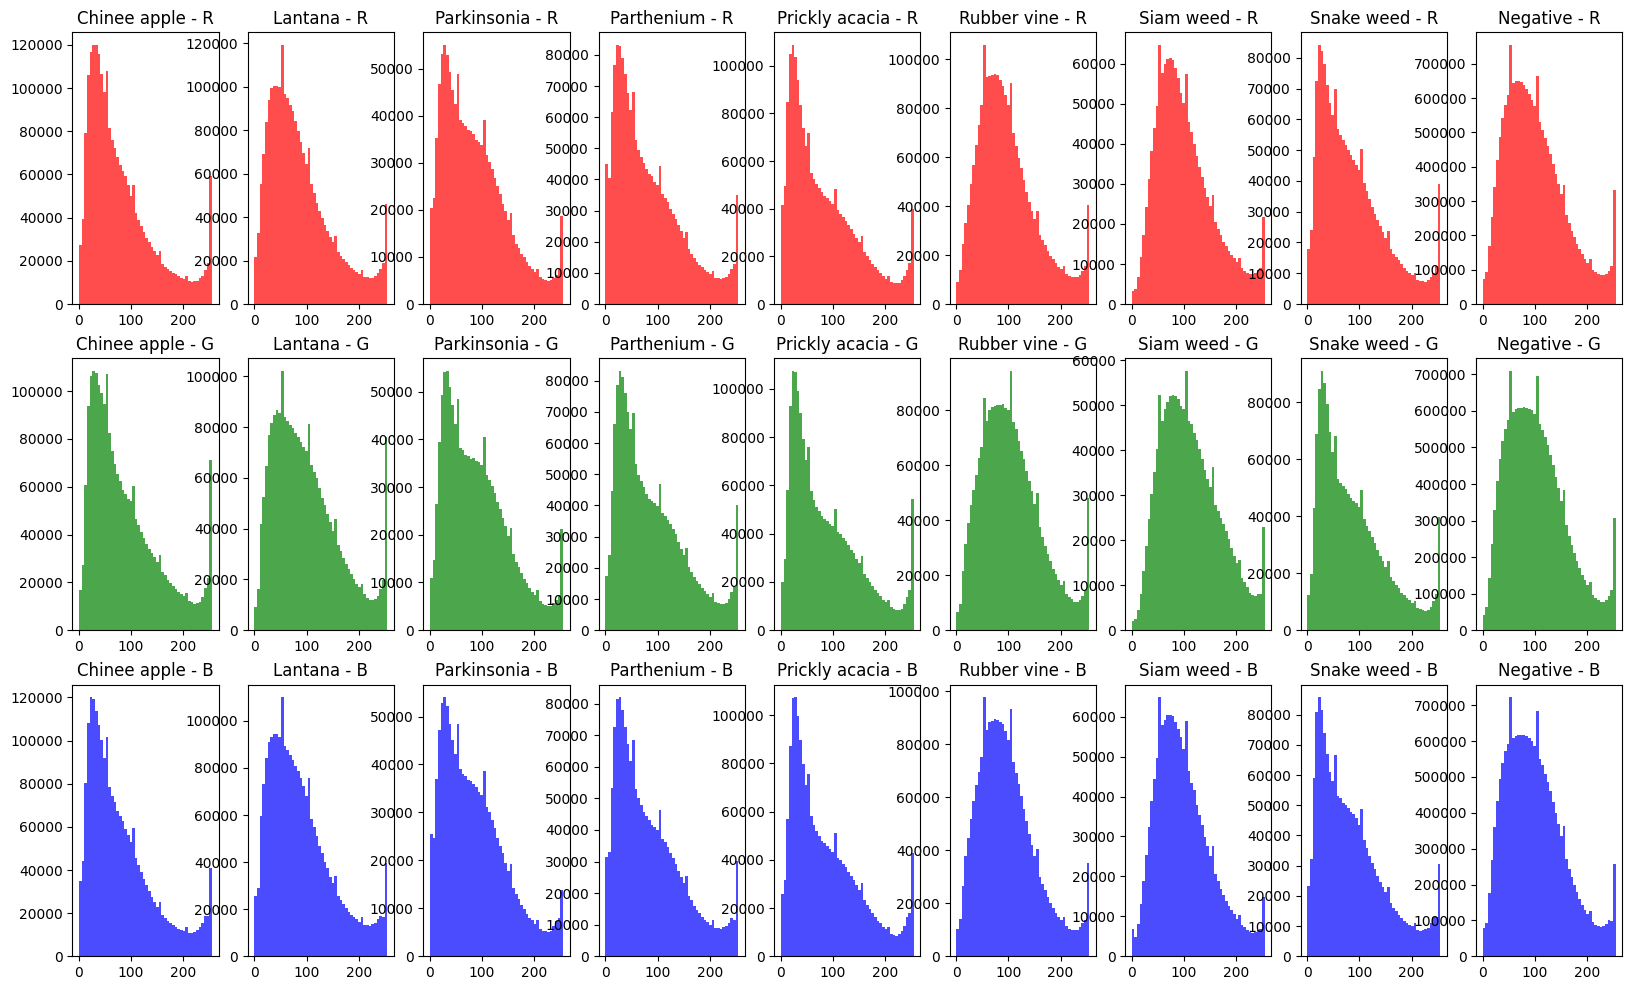

In [6]:
# Analizza le dimensioni delle immagini
image_shapes = []
for image, _ in training_set.take(1):
    image_shapes.append(image.shape)

# Analisi della distribuzione dei colori per classe
color_stats_by_class = {}

for image, label in training_set.take(500):
    label_name = class_names[label.numpy()]
    if label_name not in color_stats_by_class:
        color_stats_by_class[label_name] = {'r': [], 'g': [], 'b': []}
    
    # Calcola statistiche sui canali RGB
    image_np = image.numpy()
    color_stats_by_class[label_name]['r'].extend(image_np[:,:,0].flatten())
    color_stats_by_class[label_name]['g'].extend(image_np[:,:,1].flatten())
    color_stats_by_class[label_name]['b'].extend(image_np[:,:,2].flatten())

# Visualizza istogrammi dei colori per classe
fig, axes = plt.subplots(3, len(class_names), figsize=(20, 12))
for i, class_name in enumerate(class_names):
    if class_name in color_stats_by_class:
        for j, color in enumerate(['r', 'g', 'b']):
            axes[j, i].hist(color_stats_by_class[class_name][color], 
                           bins=50, alpha=0.7, color=color)
            axes[j, i].set_title(f'{class_name} - {color.upper()}')

C:\Users\amema\AppData\Local\Temp\ipykernel_5416\2568988028.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(brightness_data, labels=[name for name in class_names if name in brightness_by_class])
C:\Users\amema\AppData\Local\Temp\ipykernel_5416\2568988028.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(contrast_data, labels=[name for name in class_names if name in contrast_by_class])


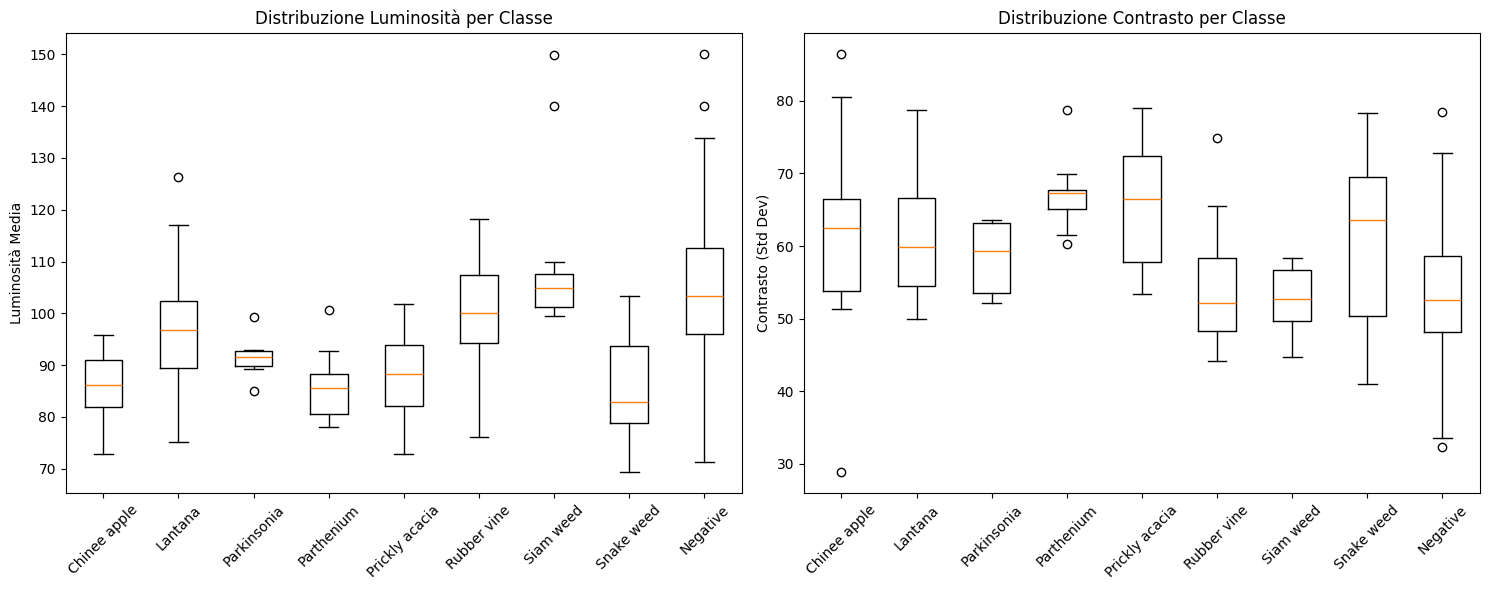

Chinee apple: Luminosità=85.3, Contrasto=61.2
Lantana: Luminosità=97.0, Contrasto=61.2
Parkinsonia: Luminosità=91.6, Contrasto=58.4
Parthenium: Luminosità=86.5, Contrasto=67.2
Prickly acacia: Luminosità=88.1, Contrasto=65.4
Rubber vine: Luminosità=100.1, Contrasto=54.1
Siam weed: Luminosità=110.4, Contrasto=52.6
Snake weed: Luminosità=86.0, Contrasto=61.1
Negative: Luminosità=103.5, Contrasto=53.5


In [7]:
import cv2

def analyze_brightness_contrast(image):
    # Converti in grayscale
    gray = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2GRAY)
    
    # Calcola luminosità (media dei pixel)
    brightness = np.mean(gray)
    
    # Calcola contrasto (deviazione standard)
    contrast = np.std(gray)
    
    return brightness, contrast

brightness_by_class = {}
contrast_by_class = {}

for image, label in training_set.take(200):
    class_name = class_names[label.numpy()]
    brightness, contrast = analyze_brightness_contrast(image)
    
    if class_name not in brightness_by_class:
        brightness_by_class[class_name] = []
        contrast_by_class[class_name] = []
    
    brightness_by_class[class_name].append(brightness)
    contrast_by_class[class_name].append(contrast)

# Visualizza boxplot per luminosità e contrasto
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot luminosità
brightness_data = [brightness_by_class[class_name] for class_name in class_names if class_name in brightness_by_class]
ax1.boxplot(brightness_data, labels=[name for name in class_names if name in brightness_by_class])
ax1.set_title('Distribuzione Luminosità per Classe')
ax1.set_ylabel('Luminosità Media')
ax1.tick_params(axis='x', rotation=45)

# Boxplot contrasto
contrast_data = [contrast_by_class[class_name] for class_name in class_names if class_name in contrast_by_class]
ax2.boxplot(contrast_data, labels=[name for name in class_names if name in contrast_by_class])
ax2.set_title('Distribuzione Contrasto per Classe')
ax2.set_ylabel('Contrasto (Std Dev)')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Stampa statistiche numeriche per luminosità e contrasto
for class_name in class_names:
    if class_name in brightness_by_class:
        avg_brightness = np.mean(brightness_by_class[class_name])
        avg_contrast = np.mean(contrast_by_class[class_name])
        print(f"{class_name}: Luminosità={avg_brightness:.1f}, Contrasto={avg_contrast:.1f}")



# 6. Analisi qualità immagini

Verifichiamo che non ci siano immagini sfocate, rumorose o con dimensioni anomale

In [8]:
# Controlla se ci sono immagini corrotte o con dimensioni anomale
print("=== CONTROLLO DIMENSIONE IMMAGINI ===")
corrupted_count = 0
size_variations = []

for i, (image, label) in enumerate(training_set.take(500)):
    try:
        shape = image.shape
        size_variations.append(shape[0] * shape[1])  # area dell'immagine
    except:
        corrupted_count += 1

print(f"Immagini corrotte trovate: {corrupted_count}")

=== CONTROLLO DIMENSIONE IMMAGINI ===
Immagini corrotte trovate: 0


In [9]:
# Calcolo metriche di qualità su un campione di immagini
print("=== ANALISI QUALITÀ IMMAGINI ===")

quality_metrics = {
    'sharpness': [],
    'blur_score': [],
    'noise_level': []
}

# Analizza un campione di immagini
sample_size = 100
for i, (image, label) in enumerate(training_set.take(sample_size)):
    gray = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2GRAY)
    
    # Calcolo Nitidezza
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharpness = laplacian.var()
    
    # Calcolo Sfocatura  
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    blur_score = magnitude.mean()
    
    # Calcolo Rumore
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    noise_level = np.mean(np.abs(gray.astype(float) - blurred.astype(float)))
    
    quality_metrics['sharpness'].append(sharpness)
    quality_metrics['blur_score'].append(blur_score)
    quality_metrics['noise_level'].append(noise_level)

# Statistiche delle metriche di qualità
print(f"Campione analizzato: {sample_size} immagini")
print(f"Nitidezza media: {np.mean(quality_metrics['sharpness']):.1f} (±{np.std(quality_metrics['sharpness']):.1f})")
print(f"Blur score medio: {np.mean(quality_metrics['blur_score']):.1f} (±{np.std(quality_metrics['blur_score']):.1f})")
print(f"Noise level medio: {np.mean(quality_metrics['noise_level']):.1f} (±{np.std(quality_metrics['noise_level']):.1f})")

=== ANALISI QUALITÀ IMMAGINI ===
Campione analizzato: 100 immagini
Nitidezza media: 18818.2 (±9890.9)
Blur score medio: 187.6 (±43.2)
Noise level medio: 21.7 (±6.1)


# Summary Finale

Di seguito sono elencate le diverse misure statistiche calcolate

In [10]:
# Estrai dimensioni dalla singola immagine analizzata
height, width, channels = image_shapes[0]

print("\n" + "="*50)
print("SUMMARY ESPLORAZIONE DATASET")
print("="*50)
print(f"Dataset: DeepWeeds")
print(f"Totale immagini: {info.splits['train'].num_examples}")
print(f"Classi: {len(class_names)}")
print(f"Dimensioni uniformi: {height}x{width} pixels")
print(f"Canali colore: {channels}")
print("")
print("=== DISTRIBUZIONE CLASSI ===")
print(f"Bilanciamento: {imbalance_ratio:.1f}:1 (max/min)")
print(f"Media immagini per classe: {counts_array.mean():.1f}")
print(f"Deviazione standard: {counts_array.std():.1f}")
print("")
print("=== CARATTERISTICHE IMMAGINI ===")
print(f"Luminosità media: {np.mean([np.mean(brightness_by_class[c]) for c in brightness_by_class]):.1f}")
print(f"Contrasto medio: {np.mean([np.mean(contrast_by_class[c]) for c in contrast_by_class]):.1f}")
print("")
print("=== QUALITÀ IMMAGINI ===")
print(f"Immagini corrotte: {corrupted_count}")
print(f"Area uniforme: {min(size_variations)} pixel² (tutte uguali)")
print(f"Campione analizzato: {sample_size} immagini")
print(f"Nitidezza media: {np.mean(quality_metrics['sharpness']):.1f} (±{np.std(quality_metrics['sharpness']):.1f})")
print(f"Blur score medio: {np.mean(quality_metrics['blur_score']):.1f} (±{np.std(quality_metrics['blur_score']):.1f})")
print(f"Noise level medio: {np.mean(quality_metrics['noise_level']):.1f} (±{np.std(quality_metrics['noise_level']):.1f})")
print("="*50)


SUMMARY ESPLORAZIONE DATASET
Dataset: DeepWeeds
Totale immagini: 17509
Classi: 9
Dimensioni uniformi: 256x256 pixels
Canali colore: 3

=== DISTRIBUZIONE CLASSI ===
Bilanciamento: 9.0:1 (max/min)
Media immagini per classe: 1945.4
Deviazione standard: 2531.9

=== CARATTERISTICHE IMMAGINI ===
Luminosità media: 94.3
Contrasto medio: 59.4

=== QUALITÀ IMMAGINI ===
Immagini corrotte: 0
Area uniforme: 65536 pixel² (tutte uguali)
Campione analizzato: 100 immagini
Nitidezza media: 18818.2 (±9890.9)
Blur score medio: 187.6 (±43.2)
Noise level medio: 21.7 (±6.1)
